# Difference of Gaussian (DoG)

### Gaussian distribution in 2D:

    Gσ (x,y) = 1/(σ√2π).(e^( -x^2 -y^2 )/ 2σ^2)
### Difference of Gaussian in 2D:
    DoG σ1,σ2 (x , y) = Gσ1 (x , y) − Gσ2 (x , y)
                      = 1/√2π[1/(σ1).(e^( -x^2 -y^2 )/ 2(σ1)^2) - 1/(σ2).(e^( -x^2 -y^2 )/ 2(σ2)^2)]
    

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

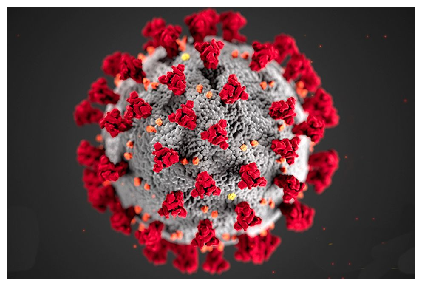

In [2]:
#Import image
src = cv2.imread("/home/sharare/Desktop/coro.jpg")
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

#Show the image with matplotlib
plt.figure(figsize=(8, 5))
plt.axis("off")
plt.imshow(img)


In [12]:
def DoG(sigma1, sigma2, filter_size):
    nn = filter_size//2
    a = np.asarray([[x**2 + y**2 for x in range(-nn,nn+1)] for y in range(-nn,nn+1)])
    gaussian1 = np.exp(-a/(2*sigma1**2))/(math.sqrt(math.pi*2)*sigma1)
    gaussian2 = np.exp(-a/(2*sigma2**2))/(math.sqrt(math.pi*2)*sigma2)
    filter2D = (gaussian1 - gaussian2)
    return filter2D


def convolve2d(alpha1, alpha2, kernel, img=None):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    kernel = kernel
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(img)

    # Add zero padding to the input image
    image_padded = []
    pad = len(kernel)//2
    filter_size = len(kernel)
    for d in range(3):
        padded = np.zeros((img.shape[0] + (filter_size//2)*2, img.shape[1] + (filter_size//2)*2))
        padded[pad:img.shape[0]+pad , pad:img.shape[1]+pad ] = img[:,:,d]
        image_padded.append(padded)
    im_padd = np.stack(image_padded, axis=2).astype("uint8")    
    
    # Loop over every pixel of the image
    for d in range(img.shape[2]):
        for x in range(img.shape[1]):
            for y in range(img.shape[0]):
                # element-wise multiplication of the kernel and the image
                output[y, x, d]=np.sum(kernel * im_padd[y: y+filter_size, x: x+filter_size, d])
    r, g, b = output[:,:,0], output[:,:,1], output[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b            
    return gray


def K_part_DoG(alpha1, alpha2, filter_size, k_cut):
    
    kernel = DoG(alpha1, alpha2, filter_size) 
    fig = plt.figure("DoGconvolve")
    filtered = convolve2d(alpha1, alpha2, kernel, img)
    plt.axis("off")
    plt.imshow(filtered,cmap = 'gray')
    fig.suptitle("Convolution images with k parts", fontsize="x-large")
    #make image k part 
    k_part = np.asarray([256//k_cut*i for i in range(0,k_cut+1)])
    matrix = np.zeros((filtered.shape[0],filtered.shape[1],k_cut))
    
    for i in range(filtered.shape[0]):
        for j in range(filtered.shape[1]):
            for k in range(1,k_cut+1):
                if(filtered[i][j] <= k_part[k] and filtered[i][j] >= k_part[k-1]):
                    matrix[i][j][k-1] = filtered[i][j]
   
    #Show the image with matplotlib
    fig = plt.figure("k_part",figsize=(30, 30)) 
    for i in range(k_cut):
        plt.subplot(k_cut,1,i+1)
        plt.axis("off")
        plt.imshow(matrix[:,:,i],cmap = 'gray')

        
def DoG_Convolve(alpha1, alpha2):
    img = plt.imread("/home/sharare/Desktop/coro.jpg")
    
    BankofDoG = []
    size = [3,5,7,9,11]
    filters=[]
    fig = plt.figure("DoG filters at different scale size", figsize=(10, 4))
    fig.suptitle("DoG filters at different scale size", fontsize="x-large") 
    for i in range(len(size)):
        plt.subplot(1,5,i+1)
        kernel = DoG(alpha1, alpha2, size[i])
        filters.append(kernel)
        plt.axis("off")
        plt.imshow(kernel)
        
    
    #Show the image with matplotlib
    fig = plt.figure("Convolution images at different scale sigma and size", figsize=(16, 20))
    fig.suptitle("Convolution images at different  size", fontsize="x-large")   
    for i in range(len(size)):
        #convolution
        plt.subplot(5,1,i+1)
        filtered = convolve2d(alpha1, alpha2, filters[i], img)
        BankofDoG.append(filtered)
        plt.axis("off")
        plt.imshow(filtered,cmap = 'gray')



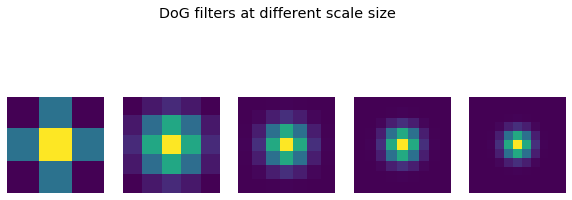

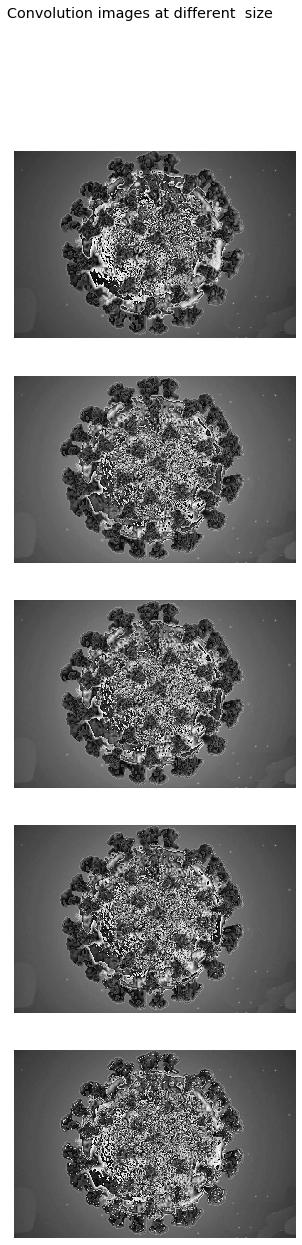

In [4]:
DoG_Convolve(1, 100)

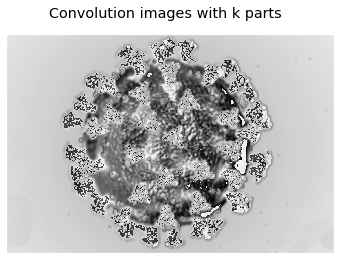

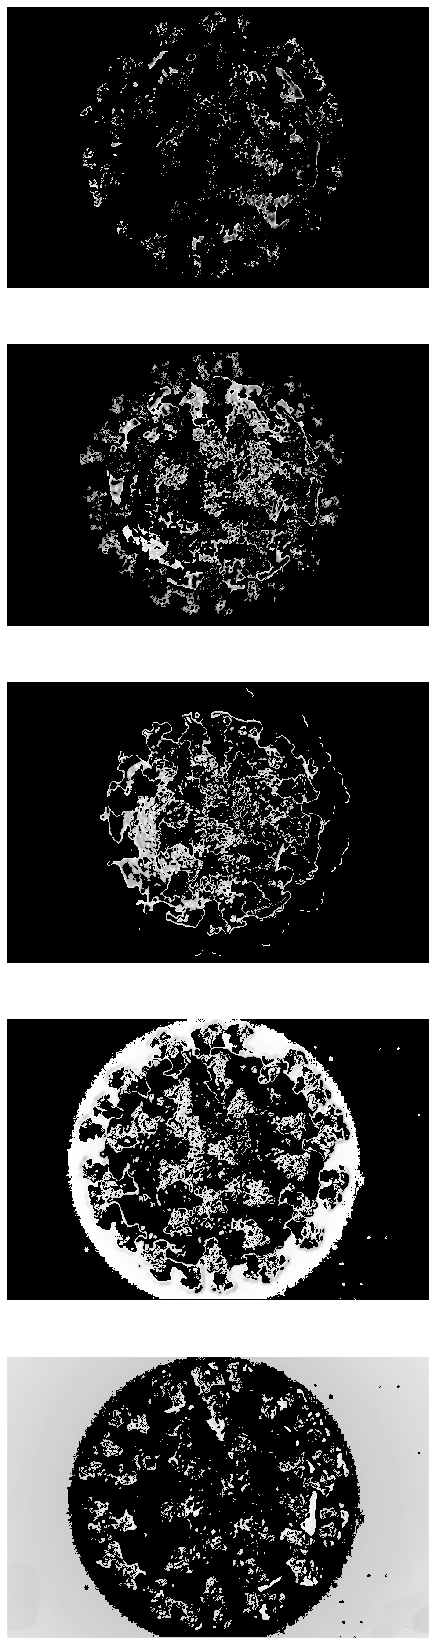

In [13]:
K_part_DoG(0.3, 1, 5, 5)

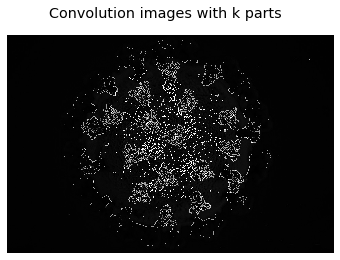

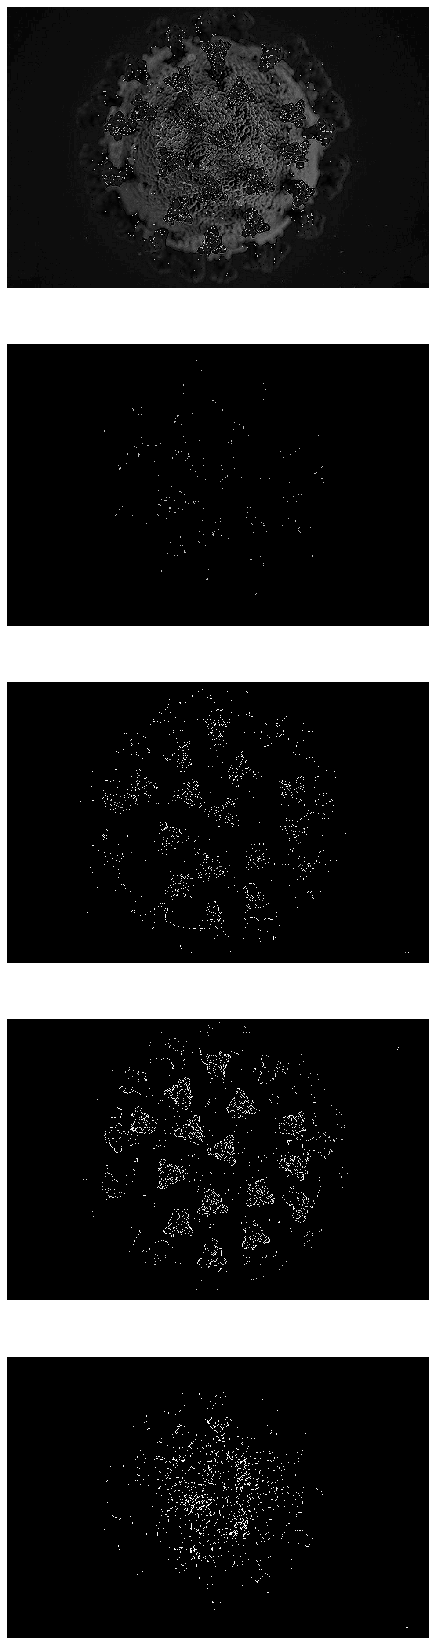

In [14]:
K_part_DoG(0.3, 0.5, 3, 5)

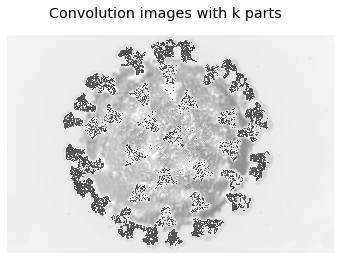

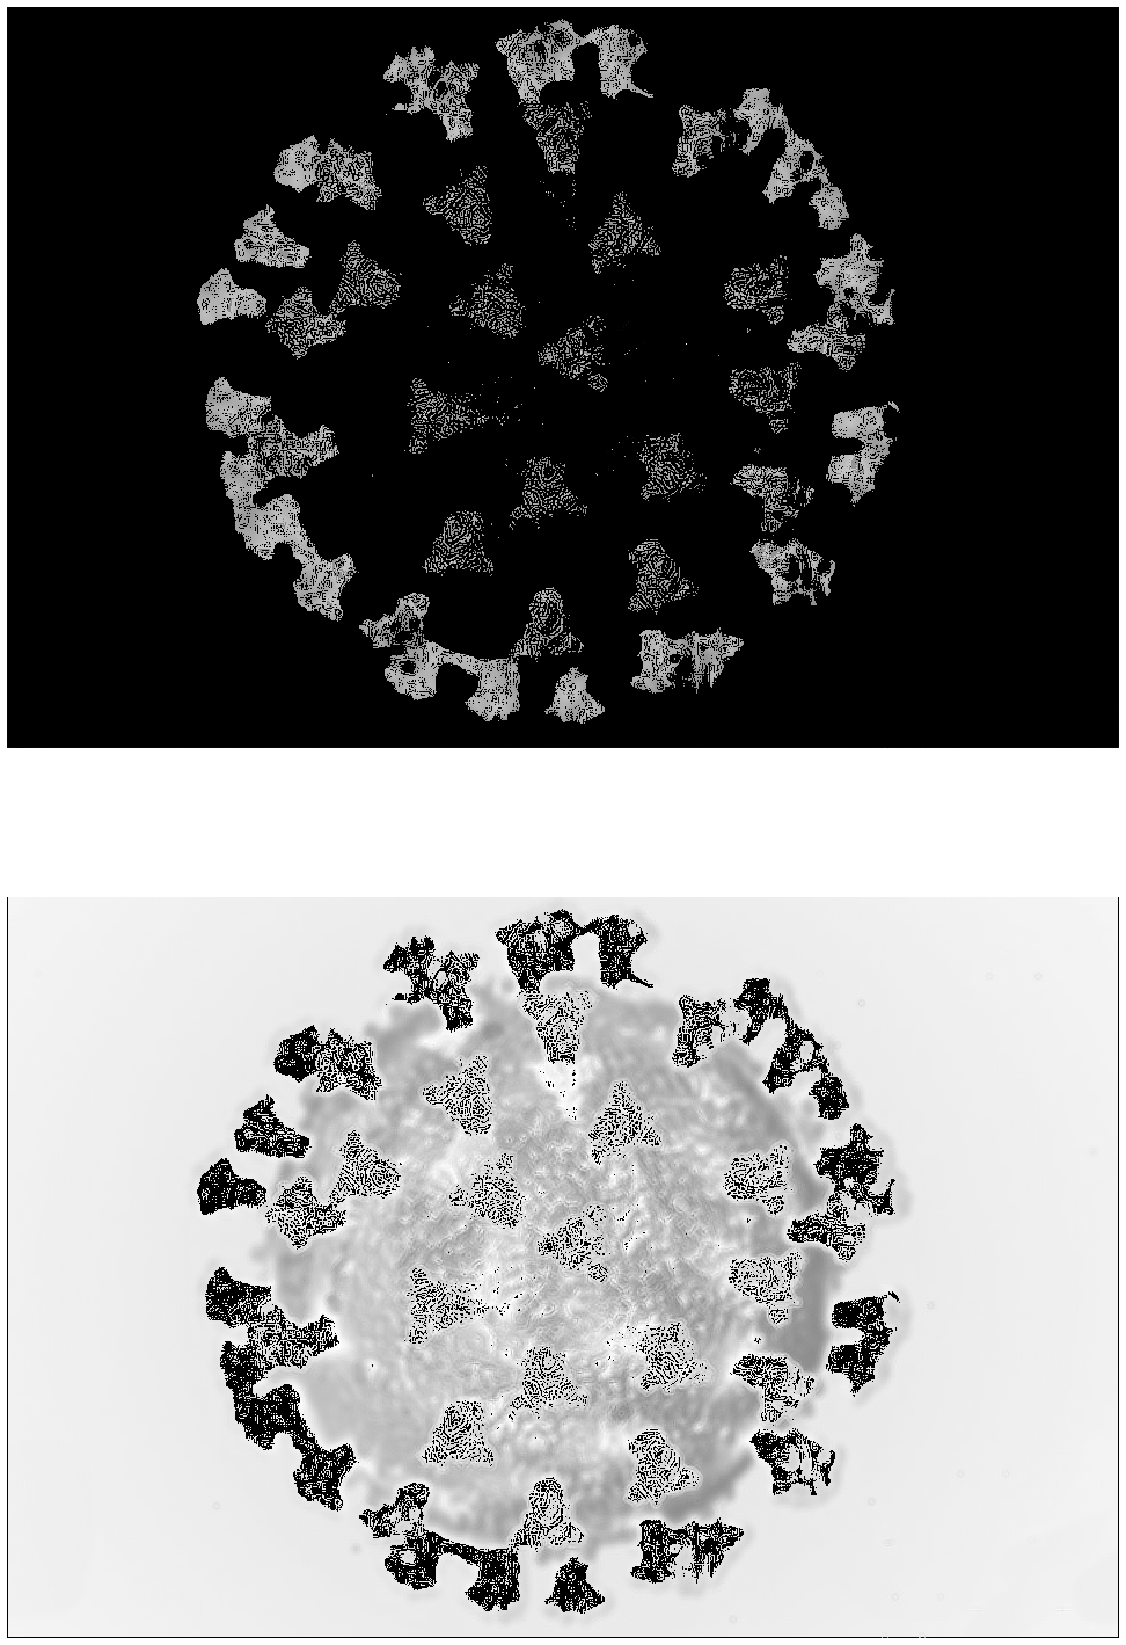

In [15]:
K_part_DoG(0.3, 1.5, 3, 2)

Sharare Zolghadr (610395109)                                                                       


Computational Neuroscience